In [1]:
library(utils)
library(dplyr)
library(tidyr)
library(lubridate)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union


Attaching package: 'lubridate'

The following object is masked from 'package:base':

    date



In [3]:
data <- read.csv("https://opendata.ecdc.europa.eu/covid19/casedistribution/csv", na.strings = "", fileEncoding = "UTF-8-BOM")
data[[1]] <- as.Date(data[[1]], "%d/%m/%Y")

data <- select(data, dateRep, countriesAndTerritories, cases, popData2019)
data <- data %>% drop_na(dateRep)
data <- data %>% filter(dateRep >= "2020-01-22" & dateRep <= "2020-07-01")

In [6]:
data <- data %>% arrange(countriesAndTerritories,dateRep)
data <- data %>% group_by(countriesAndTerritories) %>% mutate(cum_cases = cumsum(cases))
head(data %>% filter(countriesAndTerritories == "China"))

dateRep,countriesAndTerritories,cases,popData2019,cum_cases
2020-01-22,China,140,1433783692,140
2020-01-23,China,97,1433783692,237
2020-01-24,China,259,1433783692,496
2020-01-25,China,441,1433783692,937
2020-01-26,China,665,1433783692,1602
2020-01-27,China,787,1433783692,2389


In [ ]:

# ux <- unique(data['countriesAndTerritories'])
# ux # paste0( ux[2], collapse=",")
# string = paste(unique(data$countriesAndTerritories), collapse = ", ")
# string

In [7]:
# maxbycountry = ddply(data, "countriesAndTerritories", summarize, max = max(dateRep))
# maxbycountry
datag <- data %>% group_by(dateRep)
datag <- datag %>% summarise(cases = sum(cases), cum_cases = sum(cum_cases))
datag$popData2019 <- 7669215953
datag$countriesAndTerritories <- 'World'
datag <- datag[names(data)]
# head(datag)
# head(data)

In [8]:
dtogether <- bind_rows(datag, data)
head(dtogether)

Warning message in bind_rows_(x, .id):
"binding character and factor vector, coercing into character vector"

dateRep,countriesAndTerritories,cases,popData2019,cum_cases
2020-01-22,World,142,7669215953,142
2020-01-23,World,97,7669215953,239
2020-01-24,World,266,7669215953,505
2020-01-25,World,453,7669215953,958
2020-01-26,World,673,7669215953,1631
2020-01-27,World,797,7669215953,2428


In [9]:
dtogether$casesPerMillion <- with(dtogether, cum_cases / (popData2019 / 1000000))
countrylist <- c('United_States_of_America', 'United_Kingdom', 'South_Korea', 'China', 'World')
dtogether <- dtogether %>% filter(countriesAndTerritories %in% countrylist)
head(dtogether)

dateRep,countriesAndTerritories,cases,popData2019,cum_cases,casesPerMillion
2020-01-22,World,142,7669215953,142,0.01851558
2020-01-23,World,97,7669215953,239,0.03116355
2020-01-24,World,266,7669215953,505,0.06584767
2020-01-25,World,453,7669215953,958,0.12491499
2020-01-26,World,673,7669215953,1631,0.21266841
2020-01-27,World,797,7669215953,2428,0.31659038


Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Warning message:
"Transformation introduced infinite values in continuous y-axis"

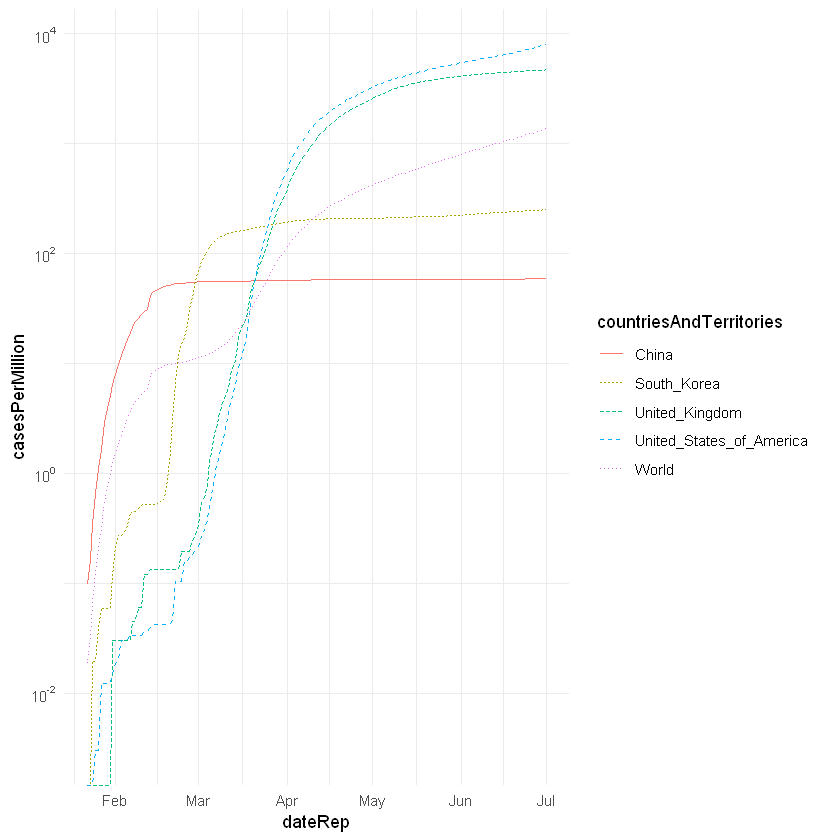

In [10]:
library(ggplot2)
library(scales)

theme_set(theme_minimal())
ggplot(data=dtogether, aes(x=dateRep, y=casesPerMillion)) +
     scale_y_log10(breaks = trans_breaks("log10", function(x) 10^x),
          labels = trans_format("log10", math_format(10^.x))) +
    geom_line(aes(color = countriesAndTerritories, linetype = countriesAndTerritories))
# +    opts(legend.background = theme_rect(col = 0))
# ggplot(df, aes(x = date, y = value)) + 
#   geom_line(aes(color = variable, linetype = variable)) + 
#   scale_color_manual(values = c("darkred", "steelblue"))